# Standardized Test Analysis

## Problem Statement

California is the largest state in population with many school districts - some that are top in the nation, others pale significantly in comparison. We hypothesize that school funding contributes positively to standardized test performances. This project aims to identify California school districts with comparatively weak standardized testing performances and explore how factors such as __school expenditures__, __household incomes__, and __student-to-faculty ratios__ affect __standardized test scores__ in each school district. We hope to provide recommendations as to how to help improve standardized test performances for these districts in need, whether through fund allocations or other means.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

In addition, California has the 3rd least equitable school districts ([*source*](https://wallethub.com/edu/e/most-least-equitable-school-districts-in-california/77056)) as well as 5th worst income inequality in the U.S. overall ([*source*](https://gvwire.com/2021/11/10/how-income-inequality-in-california-compares-to-other-states/#:~:text=The%20Gini%20coefficient%20in%20California,highest%20among%20all%2050%20states.)). Ass one of the most demographically diverse states nationwide, it is even more important ensure education equity accross students from all backgrounds.

#### Dataset Used
* [`sat_2019_ca.csv`](../data/sat_2019_ca.csv): 2019 SAT Scores in California by School  ([*source*](https://www.cde.ca.gov/re/pr/satactapdatareports.asp))
* [`act_2019_ca.csv`](../data/act_2019_ca.csv): 2019 ACT Scores in California by School ([*source*](https://www.cde.ca.gov/re/pr/satactapdatareports.asp))
* [`pubschls.csv`](../data/pubschls.csv): All Public School Records in California ([*source*](https://www.cde.ca.gov/ds/si/ds/pubschls.asp))
* [`ncesdata_expend_ca.csv.csv`](../data/ncesdata_expend_ca.csv): 2019 Expenditures in California by School District ([*source*](https://nces.ed.gov/edfin/search/peergroupdata.asp?dataid=2&subdataid=1&mt=0&pagenumber=1&bleaid=&jobid={A2629B56-1758-4ED8-AE7A-7157DBA157E6}))
* [`ncesdata_charac_ca.csv`](../data/ncesdata_charac_ca.csv):  2019 Other Characteristics in California by School District ([*source*](https://nces.ed.gov/edfin/search/peergroupdata.asp?dataid=2&subdataid=1&mt=0&pagenumber=1&bleaid=&jobid={A2629B56-1758-4ED8-AE7A-7157DBA157E6}))
* [`ncesdata_kids_poverty_ca.csv`](../data/ncesdata_kids_poverty_ca.csv): 2008 Student Poverty ACT Scores in California by School Ditrict ([*source*](https://nces.ed.gov/edfin/search/peergroupdata.asp?dataid=2&subdataid=1&mt=0&pagenumber=1&bleaid=&jobid={A2629B56-1758-4ED8-AE7A-7157DBA157E6}))
* [`ca_avg_income_by_school_district.csv`](../data/ca_avg_income_by_school_district.csv): 2019 Average Household Income by School District ([*source*](https://nces.ed.gov/))


### Outside Research

SAT and ACT scores have long been in the centre of scrutiny for their (in)effectiveness at measuring students' academic abilities, as well as more importantly, the inequity inherent in the test preperation processes. 
According to a recent Bark survey, 37.5 percent of students who receive tutoring in any subject–SAT or academic–pay between \\$51 and \\$100 an hour. The next largest chunk of students, 16 percent, pay between \\$101 and \\$150 an hour, followed by 12.5 percent of the tutored population who pay over \\$150. Only 10.7 percent of tutored students pay under \\$50 per hour, and approximately 23 percent of students didn’t know how much they pay. ([*source*](https://redwoodbark.org/11207/culture/top-culture/sat-tutoring-affects-students-scores/))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

## Data Import and Cleaning

- #### Dataset: pubschls.csv

In [3]:
df_school_code = pd.read_csv('../data/pubschls.csv')
df_school_code = df_school_code.rename(columns=df_school_code.iloc[4])[5:]
df_school_code = df_school_code.loc[:,['District','CDSCode', 'NCESDist', 'County']]

/Users/derryzrli/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_school_code['CDSCode'] = df_school_code['CDSCode'].apply(lambda x: str(x).lstrip('0'))

In [5]:
df_school_code.rename({'District': 'school_district', 'CDSCode': 'cds', 'NCESDist': 'LEAID', 'County': 'county'}, axis=1, inplace=True)

In [6]:
df_school_code.head(3)

,school_district,cds,LEAID,county
5,Alameda County Office of Education,1100170000000,0691051,Alameda
6,Alameda County Office of Education,1100170109835,0691051,Alameda
7,Alameda County Office of Education,1100170112607,0691051,Alameda


---

- #### Dataset: sat_2019_ca.csv

In [7]:
df_sat = pd.read_csv('../data/sat_2019_ca.csv')

In [8]:
df_sat.drop(['Unnamed: 25'], axis=1, inplace=True)

Define functions to be used for type conversion:

In [9]:
def to_f(col):
    df_sat[col] = df_sat[col].replace({'*':np.nan}).astype(float)

In [10]:
def to_s(col):
    df_sat[col] = df_sat[col].replace({'*':np.nan}).astype(str).apply(lambda x: x.split('.')[0])

In [11]:
cols_to_be_float = ['NumERWBenchmark12', 'PctERWBenchmark12','NumMathBenchmark12', 'PctMathBenchmark12',
                    'NumERWBenchmark11', 'PctERWBenchmark11', 'NumMathBenchmark11','PctMathBenchmark11',
                    'TotNumBothBenchmark12', 'PctBothBenchmark12', 'TotNumBothBenchmark11', 'PctBothBenchmark11']

Convert column types:

In [12]:
for col in cols_to_be_float:
    to_f(col)

In [13]:
for col in ['CDS', 'CCode', 'CDCode', 'SCode']:
    to_s(col)

In [14]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2580 non-null   object 
 1   CCode                  2580 non-null   object 
 2   CDCode                 2580 non-null   object 
 3   SCode                  2580 non-null   object 
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      1722 non-null   float64
 11  PctERWBenchmark12      1722 non-null   float64
 12  NumMathBenchmark12     1722 non-null   float64
 13  PctMathBenchmark12     1722 non-null   float64
 14  Enroll11               2579 non-null   float64
 15  NumT

In [15]:
df_sat.describe()

,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11
count,2579.000000,2579.000000,1722.000000,1722.000000,1722.000000,1722.000000,2579.000000,2579.000000,1736.000000,1736.000000,1736.000000,1736.000000,1722.000000,1722.000000,1736.000000,1736.000000
mean,748.155487,264.274137,269.540070,68.318438,188.859466,45.783542,730.865452,320.473052,331.427419,71.922811,249.550115,53.917483,178.732288,43.371707,238.700461,51.548209
std,10095.758681,3568.205236,2956.948278,20.329336,2063.412843,22.877347,9792.971460,4396.615761,3667.165356,22.834356,2739.617680,27.172820,1951.895654,22.892739,2619.043707,27.241254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,5.000000,33.000000,54.622500,17.000000,27.512500,52.500000,5.000000,39.000000,58.397500,23.000000,30.902500,16.000000,25.000000,22.000000,27.780000
50%,171.000000,55.000000,79.000000,71.810000,48.500000,45.040000,165.000000,62.000000,86.000000,77.780000,60.000000,57.140000,44.500000,42.330000,57.000000,53.900000
75%,462.000000,161.000000,161.000000,85.110000,117.750000,64.022500,474.000000,180.000000,199.250000,90.457500,154.250000,76.487500,113.000000,61.482500,149.000000,74.180000
max,489650.000000,170411.000000,116500.000000,100.000000,81551.000000,100.000000,474843.000000,206642.000000,144318.000000,100.000000,108635.000000,100.000000,77178.000000,100.000000,103915.000000,99.680000


Rename column names to follow convention and readability:

In [16]:
rename_dict = {
    'CDS': 'cds',
    'CCode': 'county_code',
    'CDCode': 'district_code',
    'SCode': 'school_code',
    'RType':'record_type',
    'SName': 'school_name',
    'DName': 'school_district',
    'CName': 'county_name',
    'Enroll12':'enrollment_12',
    'NumTSTTakr12': 'total_tester_12',
    'NumERWBenchmark12': '#erw_12',
    'PctERWBenchmark12': '%erw_12',
    'NumMathBenchmark12': '#math_12',
    'PctMathBenchmark12':'%math_12',
    'Enroll11':'enrollment_11',
    'NumTSTTakr11': 'total_tester_11',
    'NumERWBenchmark11': '#erw_11',
    'PctERWBenchmark11': '%erw_11',
    'NumMathBenchmark11': '#math_11',
    'PctMathBenchmark11':'%math_11',
    'TotNumBothBenchmark12': '#both_12', 
    'PctBothBenchmark12': '%both_12', 
    'TotNumBothBenchmark11':'#both_11', 
    'PctBothBenchmark11': '%both_11',
    'Year': 'year',
    'NumTstTakr':'num_tester_act',
    'AvgScrRead': 'avg_reading_act',
    'AvgScrEng': 'avg_english_act',
    'AvgScrMath': 'avg_math_act',
    'AvgScrSci': 'avg_science_act',
    'NumGE21': '#act_testers>21',
    'PctGE21': '%act_testers>21'
}

In [17]:
df_sat.rename(rename_dict, axis=1, inplace=True)

Add __LEAID__ from __df_school_code__ to __df__:

In [18]:
df_sat = pd.merge(left=df_sat, right=df_school_code, how = 'left', on='cds').drop(columns=['school_district_y', 'county']).rename({'school_district_x': 'school_district'}, axis=1)

In [19]:
df_sat.head()

,cds,county_code,district_code,school_code,record_type,school_name,school_district,county_name,enrollment_12,total_tester_12,#erw_12,%erw_12,#math_12,%math_12,enrollment_11,total_tester_11,#erw_11,%erw_11,#math_11,%math_11,#both_12,%both_12,#both_11,%both_11,year,LEAID
0,6615980630046,6,661598,630046,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN,NaN,NaN,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,0609570
1,6616060634758,6,661606,634758,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,NaN,NaN,NaN,NaN,26.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,0624150
2,19647331930924,19,1964733,1930924,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31.0,30.39,14.0,13.73,219.0,174.0,42.0,24.14,12.0,6.90,14.0,13.73,11.0,6.32,2018-19,0622710
3,19647331931476,19,1964733,1931476,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54.0,47.79,18.0,15.93,333.0,275.0,97.0,35.27,37.0,13.45,18.0,15.93,35.0,12.73,2018-19,0622710
4,19647331931856,19,1964733,1931856,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,NaN,NaN,NaN,NaN,17.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,0622710


Create an SAT dataframe that is grouped by school districts:

In [20]:
district_names = df_sat[df_sat.record_type == 'D']['school_district'].apply(lambda x: x.strip())
district_codes = df_sat[df_sat.record_type == 'D'][['district_code', 'LEAID', 'county_name']]
participation_rate_11 = df_sat[df_sat.record_type == 'D']['total_tester_11']/df_sat[df_sat.record_type == 'D']['enrollment_11']
participation_rate_12 = df_sat[df_sat.record_type == 'D']['total_tester_12']/df_sat[df_sat.record_type == 'D']['enrollment_12']
participation_rate_total = (df_sat[df_sat.record_type == 'D']['total_tester_11']+df_sat[df_sat.record_type == 'D']['total_tester_12'])/(df_sat[df_sat.record_type == 'D']['enrollment_11']+df_sat[df_sat.record_type == 'D']['enrollment_12'])
total_enroll = df_sat[df_sat.record_type == 'D']['enrollment_11']+ df_sat[df_sat.record_type == 'D']['enrollment_12']
benchmarks = df_sat[df_sat.record_type == 'D'][['%erw_12', '%math_12', '%both_12', '%erw_11', '%math_11', '%both_11']]

df_sdistrict = pd.concat([district_names, district_codes, participation_rate_11, participation_rate_12, participation_rate_total, total_enroll, benchmarks], axis=1)
df_sdistrict.columns = ['school_district', 'district_codes','LEAID', 'county','participation_rate_11', 'participation_rate_12', 'participation_rate_total', 'total_enroll', '%erw_12', '%math_12', '%both_12', '%erw_11', '%math_11', '%both_11']


In [21]:
df_sdistrict.head(2)

,school_district,district_codes,LEAID,county,participation_rate_11,participation_rate_12,participation_rate_total,total_enroll,%erw_12,%math_12,%both_12,%erw_11,%math_11,%both_11
2037,Fremont Unified,161176,0614400,Alameda,0.546380,0.333071,0.440102,5092.0,90.77,82.25,80.24,97.78,94.63,93.98
2038,Piedmont City Unified,161275,0630330,Alameda,0.466346,0.337662,0.398633,439.0,87.18,79.49,78.21,100.00,98.97,98.97


---

- #### Dataset: act_2019_ca.csv

In [22]:
df_act = pd.read_csv('../data/act_2019_ca.csv').drop(['Unnamed: 17', 'Year'], axis=1)

In [23]:
for i in range(4):
    df_act.iloc[:,i] = df_act.iloc[:,i].astype(str).apply(lambda x: x.split('.')[0])

In [24]:
df_act = df_act.rename(rename_dict, axis = 1)

In [25]:
df_act = pd.merge(left=df_act, right=df_school_code, how = 'left', on='cds').drop(columns=['school_district_y', 'county']).rename({'school_district_x': 'school_district'}, axis=1)

In [26]:
df_act.head()

,cds,county_code,district_code,school_code,record_type,school_name,school_district,county_name,enrollment_12,num_tester_act,avg_reading_act,avg_english_act,avg_math_act,avg_science_act,#act_testers>21,%act_testers>21,LEAID
0,33669930129882,33,3366993,129882,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0604290
1,19642121995596,19,1964212,1995596,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0601620
2,15637761530377,15,1563776,1530377,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0637620
3,43696664333795,43,4369666,4333795,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,0634590
4,19647331935121,19,1964733,1935121,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,0622710


In [27]:
df_act.iloc[:,10:16] = df_act.iloc[:,10:16].replace({'*': np.nan}).astype(float)

Create an ACT dataframe that is grouped by school districts:

In [28]:
district_names_a = df_act[df_act.record_type == 'D']['school_district'].apply(lambda x: x.strip())
district_codes_a = df_act[df_act.record_type == 'D'][['district_code', 'LEAID', 'county_name']]
participation_rate_12_a = df_act[df_act.record_type == 'D']['num_tester_act']/df_act[df_act.record_type == 'D']['enrollment_12']
enrollment_12_a = df_act[df_act.record_type == 'D']['enrollment_12']
avg_comp_act = (df_act[df_act.record_type=='D']['avg_english_act'] + df_act[df_act.record_type=='D']['avg_reading_act'] + df_act[df_act.record_type=='D']['avg_math_act'] + df_act[df_act.record_type=='D']['avg_science_act']) /4
avg_scores_act = df_act[df_act.record_type == 'D'][['avg_english_act', 'avg_reading_act','avg_math_act', 'avg_science_act', '%act_testers>21']]

df_adistrict = pd.concat([district_names_a, district_codes_a, participation_rate_12_a, enrollment_12_a, avg_comp_act, avg_scores_act], axis=1)
df_adistrict.columns = ['school_district', 'district_codes','LEAID', 'county','participation_rate_12_act', 'enrollment_12', 'avg_comp_act', 'avg_english_act', 'avg_reading_act','avg_math_act', 'avg_science_act', '%act_testers>21']

In [29]:
df_adistrict.head(1)

,school_district,district_codes,LEAID,county,participation_rate_12_act,enrollment_12,avg_comp_act,avg_english_act,avg_reading_act,avg_math_act,avg_science_act,%act_testers>21
1122,Alameda County Office of Education,110017,0691051,Alameda,0.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN


---

- #### Dataset: ncesdata_expend_ca.csv

In [30]:
df_expend = pd.read_csv('../data/ncesdata_expend_ca.csv')

df_expend = df_expend.rename(columns=df_expend.iloc[3])[4:].rename({'DistrictName': 'school_district', 
                                                                    'TotalCurrentExpendituresPerStudent': 'total_cur_exp',
                                                                    'InstructionalExpendituresPerStudent': 'instructional_exp',
                                                                    'StudentandStaffSupportPerStudent': 'student_staff_support_exp',
                                                                    'AdministrationPerStudent': 'admin_exp',
                                                                    'OperationsPerStudent': 'operations_exp'}, axis=1)

df_expend = df_expend.loc[:, ['school_district', 'LEAID', 'total_cur_exp', 'instructional_exp', 'student_staff_support_exp', 'admin_exp','operations_exp']]
df_expend.iloc[:, 2:] = df_expend.iloc[:, 2:].astype(float)
df_expend = df_expend.groupby(by=['school_district', 'LEAID']).mean()
df_expend.head(1)

,,total_cur_exp,instructional_exp,student_staff_support_exp,admin_exp,operations_exp
school_district,LEAID,,,,,
ABC Unified,0601620,12188.859028,7461.275348,1368.678231,1511.11654,1847.788908


---

- #### Dataset: ncesdata_charac_ca.csv

In [31]:
df_charac = pd.read_csv('../data/ncesdata_charac_ca.csv')
df_charac = df_charac.rename(columns=df_charac.iloc[3])[4:].rename({'DistrictName': 'school_district', 
                                                                    'StudentTeacherRatio': 'student_teacher_ratio'}, axis=1)
df_charac = df_charac.loc[:, ['school_district','LEAID','student_teacher_ratio']]
df_charac.student_teacher_ratio = df_charac.student_teacher_ratio.astype(float)
df_charac = df_charac.groupby(by=['school_district','LEAID']).mean()
df_charac.head(1)

,,student_teacher_ratio
school_district,LEAID,
ABC Unified,0601620,24.734107


---

- #### Dataset: ncesdata_kids_poverty_ca.csv

In [32]:
df_kp = pd.read_csv('../data/ncesdata_kids_poverty_ca.csv')
df_kp = df_kp.rename(columns=df_kp.iloc[3])[4:].rename({'NAME': 'school_district', 
                                                        'LocaleText': 'locale_type',
                                                        'PercentPoverty': '%kids_poverty'}, axis=1)
df_locale_type = df_kp.loc[:, ['LEAID','locale_type']]
df_kp = df_kp.loc[:, ['school_district', 'LEAID', '%kids_poverty']]

df_kp.iloc[:,2] = df_kp.iloc[:,2].astype(float)
df_kp = df_kp.groupby(by=['school_district','LEAID']).mean()
df_kp.head(1)

,,%kids_poverty
school_district,LEAID,
ABC Unified,0601620,15.147968


---

We combine the last three dataframes: 

In [33]:
df_combined = pd.concat([df_charac, df_expend, df_kp], axis = 1).reset_index()
df_combined = pd.merge(left=df_combined, right=df_locale_type, on='LEAID', how='left')
df_combined.head(1)

,school_district,LEAID,student_teacher_ratio,total_cur_exp,instructional_exp,student_staff_support_exp,admin_exp,operations_exp,%kids_poverty,locale_type
0,ABC Unified,0601620,24.734107,12188.859028,7461.275348,1368.678231,1511.11654,1847.788908,15.147968,Suburb: Large


---

We now combine df_combined again with the SAT dataframe grouped by district:

In [34]:
df_big_sat = pd.merge(left=df_sdistrict, right=df_combined, how='left', on=['school_district', 'LEAID'])

In [35]:
df_big_sat.head(1)

,school_district,district_codes,LEAID,county,participation_rate_11,participation_rate_12,participation_rate_total,total_enroll,%erw_12,%math_12,%both_12,%erw_11,%math_11,%both_11,student_teacher_ratio,total_cur_exp,instructional_exp,student_staff_support_exp,admin_exp,operations_exp,%kids_poverty,locale_type
0,Fremont Unified,161176,0614400,Alameda,0.54638,0.333071,0.440102,5092.0,90.77,82.25,80.24,97.78,94.63,93.98,22.486952,11629.191987,7778.218546,1119.260635,1299.122215,1432.590592,8.032289,Suburb: Large


---

#### We now combine df_conbined again with the ACT dataframe grouped by district.

In [36]:
df_big_act = pd.merge(left=df_adistrict, right=df_combined, how='left', on=['school_district', 'LEAID'])

In [37]:
df_big_act.head(1)

,school_district,district_codes,LEAID,county,participation_rate_12_act,enrollment_12,avg_comp_act,avg_english_act,avg_reading_act,avg_math_act,avg_science_act,%act_testers>21,student_teacher_ratio,total_cur_exp,instructional_exp,student_staff_support_exp,admin_exp,operations_exp,%kids_poverty,locale_type
0,Alameda County Office of Education,110017,0691051,Alameda,0.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,City: Midsize


---

#### Dataset: ca_avg_income_by_school_district.csv

We read in this dataset to append income information onto the existing datasets:

In [38]:
df_income = pd.read_csv('../data/ca_avg_income_by_school_district.csv',  names=['school_district','temp','avg_household_income']).drop('temp', axis =1)

In [39]:
df_income.avg_household_income = df_income.avg_household_income.apply(lambda x: x.split(',')[0][1:]+x.split(',')[1]).astype(float)

In [40]:
df_income.school_district = df_income.school_district.apply(lambda x: x.strip())
df_income.head(2)

,school_district,avg_household_income
0,Chino Valley Unified,93442.0
1,Rio Elementary,85938.0


In [41]:
df_big_sat = pd.merge(left= df_big_sat, right=df_income, on='school_district', how='left')
df_big_act = pd.merge(left= df_big_act, right=df_income, on='school_district', how='left')

Save the cleaned conbined big datasets to new csv files:

In [42]:
df_big_sat.to_csv('../data/sat_2019_ca_cleaned.csv')
df_big_act.to_csv('../data/act_2019_ca_cleaned.csv')

---

## Exploratory Data Analysis

In [44]:
df_sat.describe()

,enrollment_12,total_tester_12,#erw_12,%erw_12,#math_12,%math_12,enrollment_11,total_tester_11,#erw_11,%erw_11,#math_11,%math_11,#both_12,%both_12,#both_11,%both_11
count,2579.000000,2579.000000,1722.000000,1722.000000,1722.000000,1722.000000,2579.000000,2579.000000,1736.000000,1736.000000,1736.000000,1736.000000,1722.000000,1722.000000,1736.000000,1736.000000
mean,748.155487,264.274137,269.540070,68.318438,188.859466,45.783542,730.865452,320.473052,331.427419,71.922811,249.550115,53.917483,178.732288,43.371707,238.700461,51.548209
std,10095.758681,3568.205236,2956.948278,20.329336,2063.412843,22.877347,9792.971460,4396.615761,3667.165356,22.834356,2739.617680,27.172820,1951.895654,22.892739,2619.043707,27.241254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,5.000000,33.000000,54.622500,17.000000,27.512500,52.500000,5.000000,39.000000,58.397500,23.000000,30.902500,16.000000,25.000000,22.000000,27.780000
50%,171.000000,55.000000,79.000000,71.810000,48.500000,45.040000,165.000000,62.000000,86.000000,77.780000,60.000000,57.140000,44.500000,42.330000,57.000000,53.900000
75%,462.000000,161.000000,161.000000,85.110000,117.750000,64.022500,474.000000,180.000000,199.250000,90.457500,154.250000,76.487500,113.000000,61.482500,149.000000,74.180000
max,489650.000000,170411.000000,116500.000000,100.000000,81551.000000,100.000000,474843.000000,206642.000000,144318.000000,100.000000,108635.000000,100.000000,77178.000000,100.000000,103915.000000,99.680000


In [45]:
df_sat.head(1)

,cds,county_code,district_code,school_code,record_type,school_name,school_district,county_name,enrollment_12,total_tester_12,#erw_12,%erw_12,#math_12,%math_12,enrollment_11,total_tester_11,#erw_11,%erw_11,#math_11,%math_11,#both_12,%both_12,#both_11,%both_11,year,LEAID
0,6615980630046,6,661598,630046,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN,NaN,NaN,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,0609570


- #### Which California school districts have the highest and lowest mean ACT test scores?

In [46]:
df_adistrict.sort_values(by='avg_comp_act', ascending=False).head(5)

,school_district,district_codes,LEAID,county,participation_rate_12_act,enrollment_12,avg_comp_act,avg_english_act,avg_reading_act,avg_math_act,avg_science_act,%act_testers>21
1524,Fremont Union High,4369468,0614430,Santa Clara,0.315828,2761.0,30.25,31.0,30.0,31.0,29.0,94.27
1134,Piedmont City Unified,161275,0630330,Alameda,0.502165,231.0,29.75,31.0,30.0,29.0,29.0,94.83
1526,Los Gatos-Saratoga Joint Union High,4369534,0622800,Santa Clara,0.354023,870.0,29.50,30.0,30.0,29.0,29.0,96.10
1128,Fremont Unified,161176,0614400,Alameda,0.201419,2537.0,29.50,30.0,29.0,30.0,29.0,92.56
1277,La Canada Unified,1964659,0620130,Los Angeles,0.397695,347.0,28.75,29.0,29.0,29.0,28.0,94.20


In [47]:
df_adistrict.sort_values(by='avg_comp_act', ascending=False).dropna().tail(5)

,school_district,district_codes,LEAID,county,participation_rate_12_act,enrollment_12,avg_comp_act,avg_english_act,avg_reading_act,avg_math_act,avg_science_act,%act_testers>21
1504,Ravenswood City Elementary,4168999,0631860,San Mateo,1.550000,20.0,15.75,14.0,16.0,18.0,15.0,9.68
1431,Fontana Unified,3667710,0613920,San Bernardino,0.871132,2941.0,15.50,14.0,16.0,16.0,16.0,11.01
1241,Reef-Sunset Unified,1673932,0632270,Kings,0.678788,165.0,15.25,14.0,16.0,15.0,16.0,3.57
1300,Compton Unified,1973437,0609620,Los Angeles,0.584129,1361.0,15.25,14.0,16.0,16.0,15.0,7.17
1193,Golden Plains Unified,1075234,0691134,Fresno,0.152000,125.0,14.75,14.0,15.0,15.0,15.0,0.00


We see that school districts of Fremont Union High, Piedmont City Unified, Los Gatos-Saratoga Joint Union High, Fremont Unified, La Canada Unified are the 5 districts that have the highest composite ACT scores.

We see that school districts of Golden Plains Unified, Compton Unified, Reef-Sunset Unified, Fontana Unified, and Ravenswood City Elementary are the 5 districts that have the lowest composite ACT scores.

## Visualize the Data

#### Correlation Heatmap SAT

In [48]:
df_sat_corr = df_big_sat.corr()

In [49]:
df_big_sat.head(1)

,school_district,district_codes,LEAID,county,participation_rate_11,participation_rate_12,participation_rate_total,total_enroll,%erw_12,%math_12,%both_12,%erw_11,%math_11,%both_11,student_teacher_ratio,total_cur_exp,instructional_exp,student_staff_support_exp,admin_exp,operations_exp,%kids_poverty,locale_type,avg_household_income
0,Fremont Unified,161176,0614400,Alameda,0.54638,0.333071,0.440102,5092.0,90.77,82.25,80.24,97.78,94.63,93.98,22.486952,11629.191987,7778.218546,1119.260635,1299.122215,1432.590592,8.032289,Suburb: Large,133339.0


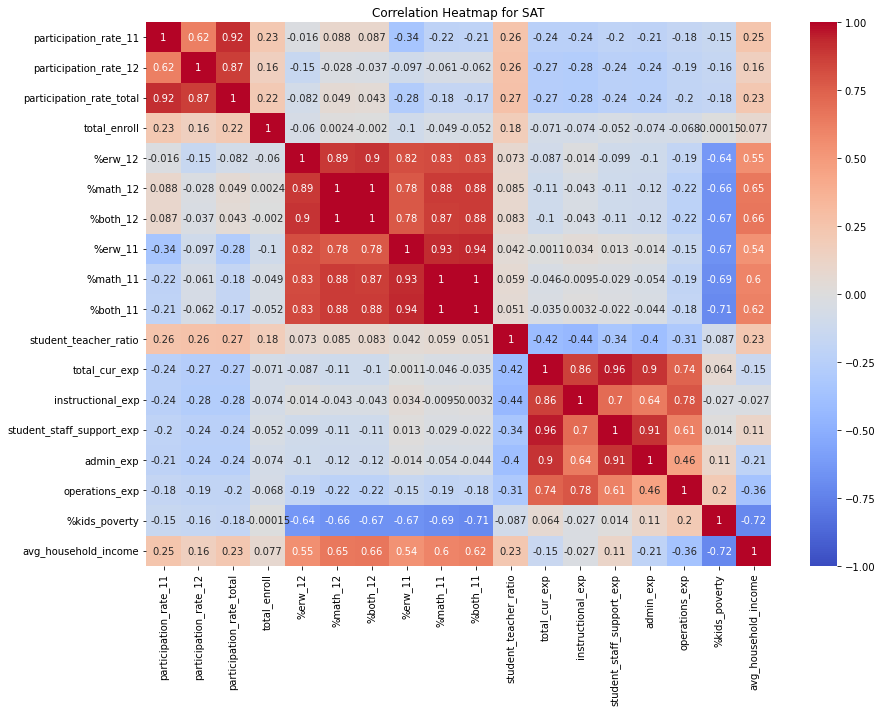

In [50]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_sat_corr, vmin=-1.0, vmax=1.0, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap for SAT')
plt.show();

We can see that there are minimal correlations between expenditures and test performance metrics, while average household income (and student poverty rate) is highly correlated with test performance metrics. We proceed to plot these pairs of our target features.

- #### Student-Teacher Ratio v.s. % Passing SAT Benchmarks

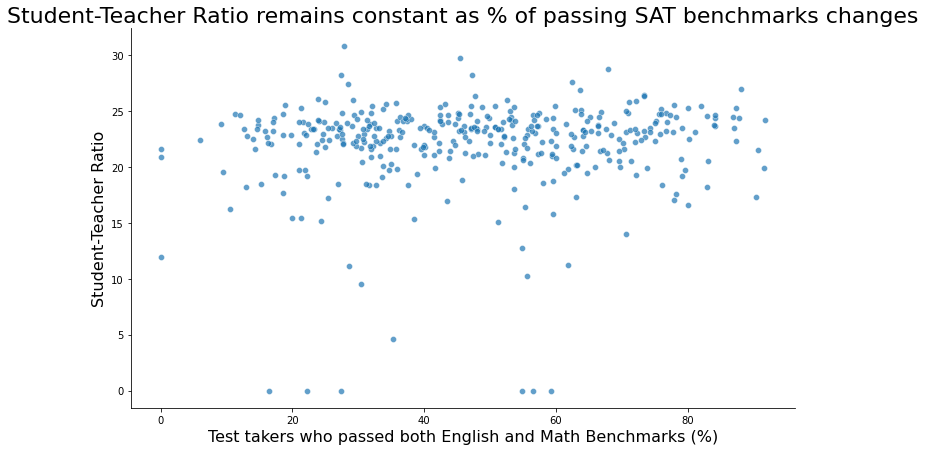

In [51]:
sns.relplot(x='%both_12', y='student_teacher_ratio', data=df_big_sat, alpha = 0.7, height=6, aspect=10/6)
plt.ylabel("Student-Teacher Ratio",fontdict={'fontsize':16})
plt.xlabel("Test takers who passed both English and Math Benchmarks (%)",fontdict={'fontsize':16})
plt.title('Student-Teacher Ratio remains constant as % of passing SAT benchmarks changes',fontdict={'fontsize':22});

We see above that it appears there is a linear relationship between Student-Teacher-Ratio and Percentage of test-takers passing both benchmarks, however we see little variance in the output values (student-teacher-ratio) and the input values (% test-takers passing both benchmarks). This means that one's change does not affect the other, hence there is no correlation between the two features. We conclude that student-teacher-ratio has __little effect__ on SAT test performance.

- #### Instructional Expenditures v.s. % Passing SAT Benchmarks

In [52]:
df_big_act.head(1)

,school_district,district_codes,LEAID,county,participation_rate_12_act,enrollment_12,avg_comp_act,avg_english_act,avg_reading_act,avg_math_act,avg_science_act,%act_testers>21,student_teacher_ratio,total_cur_exp,instructional_exp,student_staff_support_exp,admin_exp,operations_exp,%kids_poverty,locale_type,avg_household_income
0,Alameda County Office of Education,110017,0691051,Alameda,0.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,City: Midsize,NaN


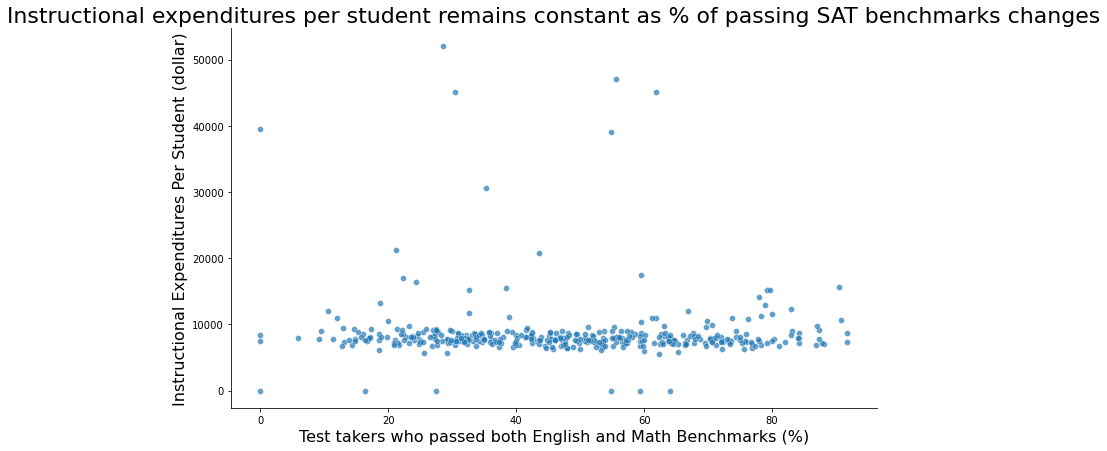

In [53]:
sns.relplot(x='%both_12', y='instructional_exp', data=df_big_sat, alpha = 0.7, height=6, aspect=10/6)
plt.ylabel("Instructional Expenditures Per Student (dollar)",fontdict={'fontsize':16})
plt.xlabel("Test takers who passed both English and Math Benchmarks (%)",fontdict={'fontsize':16})
plt.title('Instructional expenditures per student remains constant as % of passing SAT benchmarks changes',fontdict={'fontsize':22});

Same as Student-Teacher Ratio, we see that Instructional Expenditures Per Student stays relatively constant as percentages of students passing SAT benchmarks vary; thus there is minimal correlation between the two features. We conclude that instructional expenditures per student has __little effect__ on SAT test performance.

- #### % Students in poverty  v.s. % Passing SAT Benchmarks

In [54]:
df_big_sat['locale_type'] = df_big_sat['locale_type'].apply(lambda x: str(x).split(':')[0].strip())

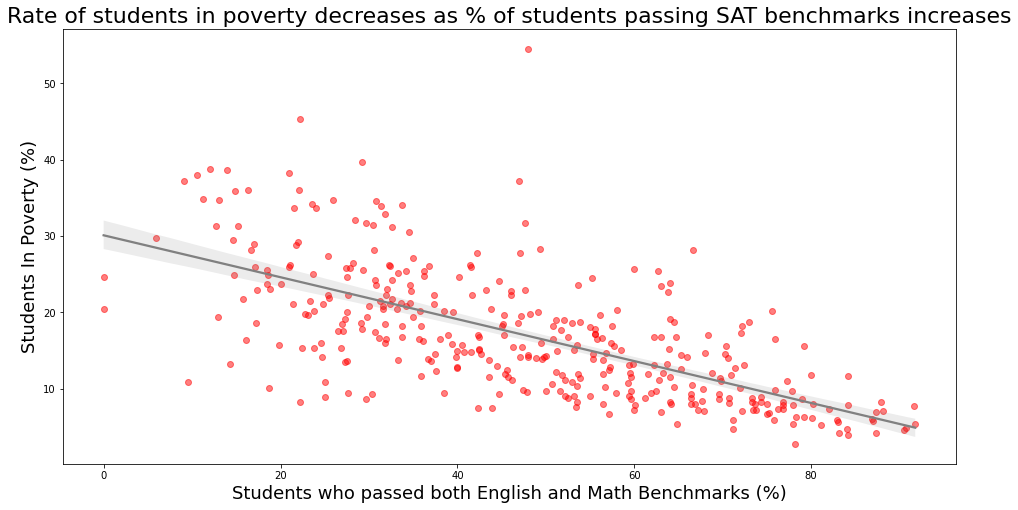

In [55]:
plt.figure(figsize=(16,8))
sns.regplot(y="%kids_poverty", x="%both_12", data=df_big_sat,scatter_kws = {'color': 'red', 'alpha': 0.5}, line_kws = {'color': 'grey'})
plt.ylabel("Students In Poverty (%)",fontdict={'fontsize':18})
plt.xlabel("Students who passed both English and Math Benchmarks (%)",fontdict={'fontsize':18})
plt.title('Rate of students in poverty decreases as % of students passing SAT benchmarks increases',fontdict={'fontsize':22});

We observe from the graph above that as more percentage of students pass SAT benchmarks, the poverty rate in students decreases. 

In [56]:
df_big_sat['locale_type'].replace({'nan':np.nan}, inplace=True)

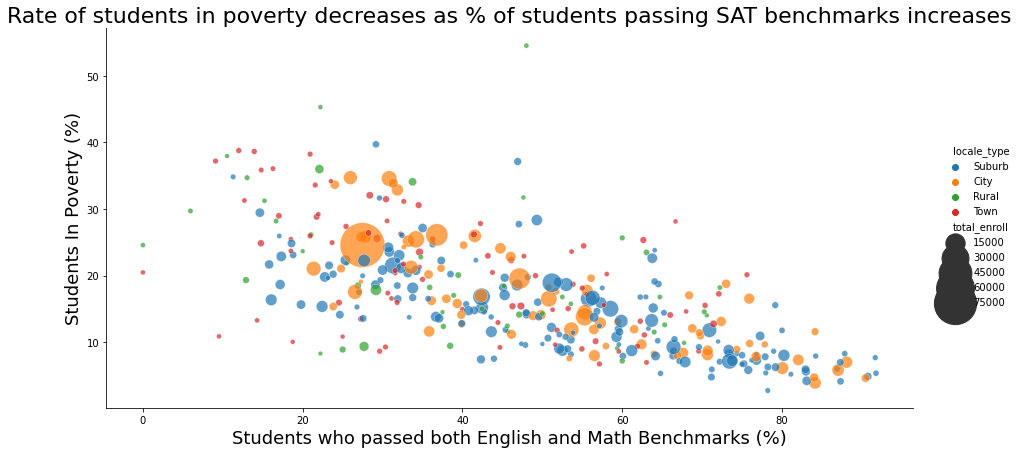

In [57]:
sns.relplot(y='%kids_poverty', x="%both_12", data=df_big_sat, hue='locale_type', size='total_enroll', sizes=(20, 2000),alpha = 0.7, height=6, aspect=12/6)
plt.ylabel("Students In Poverty (%)",fontdict={'fontsize':18})
plt.xlabel("Students who passed both English and Math Benchmarks (%)",fontdict={'fontsize':18})
plt.title('Rate of students in poverty decreases as % of students passing SAT benchmarks increases',fontdict={'fontsize':22});

The graph above is identical in data as the previous one, but it also shows that school districts that are low in student poverty rate and high in benchmark passing percentages tend to be located in cities or suburbs, with relatively small sizes.

- #### Average Household Income  v.s. % Passing SAT Benchmarks

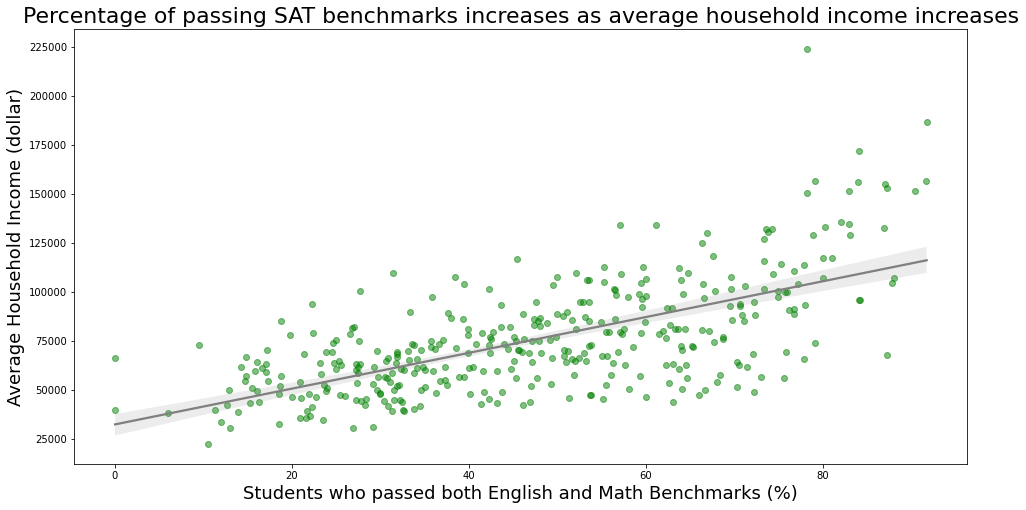

In [58]:
plt.figure(figsize=(16,8))
sns.regplot(y='avg_household_income', x="%both_12",  data=df_big_sat, scatter_kws = {'color': 'g', 'alpha': 0.5}, line_kws = {'color': 'grey'})
plt.ylabel("Average Household Income (dollar)",fontdict={'fontsize':18})
plt.xlabel("Students who passed both English and Math Benchmarks (%)",fontdict={'fontsize':18})
plt.title('Percentage of passing SAT benchmarks increases as average household income increases',fontdict={'fontsize':22});

We observe from the graph above that as more percentage of students pass SAT benchmarks, the average household income also increases.

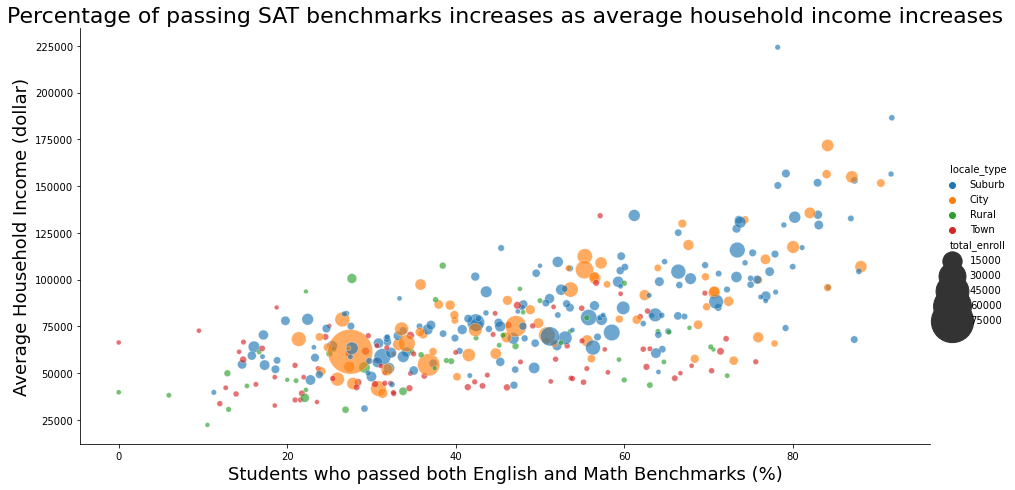

In [59]:
sns.relplot(y='avg_household_income', x="%both_12", data=df_big_sat, hue='locale_type', size='total_enroll', sizes=(20, 2000),alpha = 0.65, height=6.5, aspect=13/6.5)
plt.ylabel("Average Household Income (dollar)",fontdict={'fontsize':18})
plt.xlabel("Students who passed both English and Math Benchmarks (%)",fontdict={'fontsize':18})
plt.title('Percentage of passing SAT benchmarks increases as average household income increases',fontdict={'fontsize':22});

Again, the graph above is identical in data as the previous one, but it also shows that school districts that have high average household income and high benchmark passing percentages tend to be located in cities or suburbs, with relatively small sizes.

---

#### We perform the same plotting procedures on the cleaned ACT dataset to confirm our findings so far: 

#### Correlation Heatmap ACT

In [60]:
df_act_corr = df_big_act.corr()

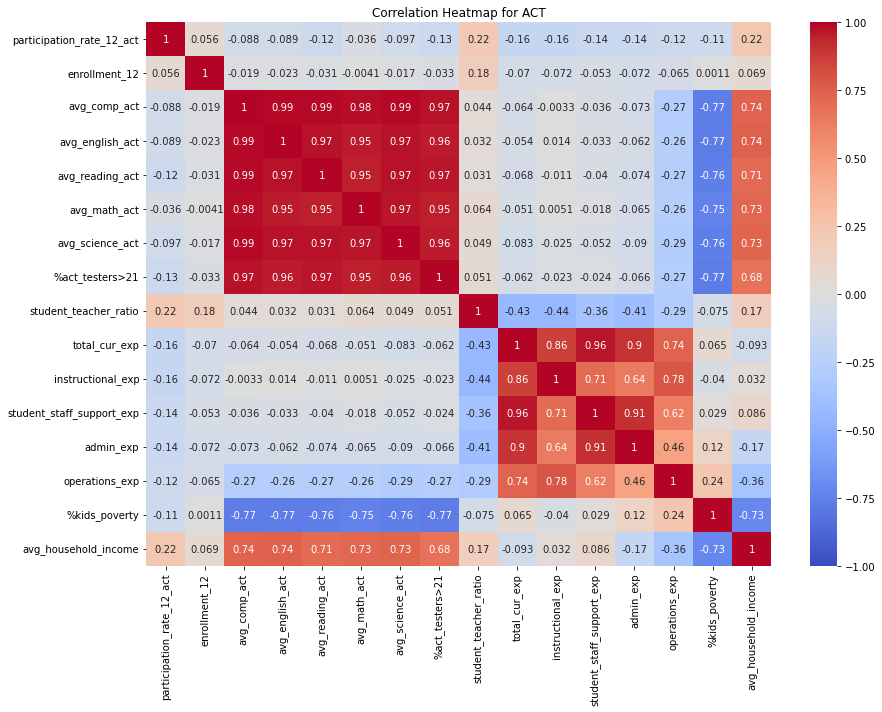

In [61]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_act_corr, vmin=-1.0, vmax=1.0, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap for ACT')
plt.show();

Again, same as our findings with the SAT data, there are minimal correlations between expenditures and test performance metrics, while average household income (and student poverty rate) is highly correlated with test performance metrics. We proceed to plot these pairs of our target features.

- #### % Students in poverty  v.s. Average ACT Composite Score

In [62]:
df_big_act['locale_type'] = df_big_act['locale_type'].apply(lambda x: str(x).split(':')[0].strip())

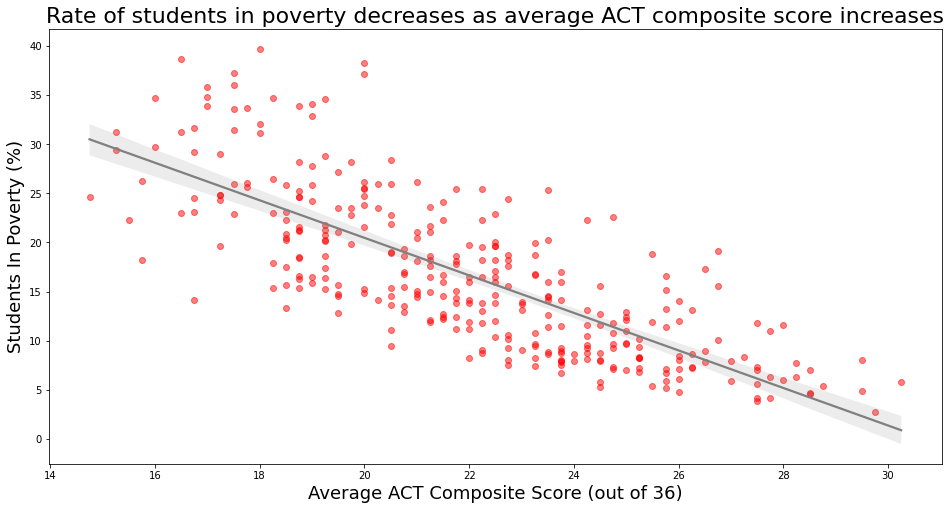

In [63]:
plt.figure(figsize=(16,8))
sns.regplot(y="%kids_poverty", x="avg_comp_act", data=df_big_act, scatter_kws = {'color': 'r', 'alpha': 0.5}, line_kws = {'color': 'grey'} )
plt.ylabel("Students In Poverty (%)",fontdict={'fontsize':18})
plt.xlabel("Average ACT Composite Score (out of 36)",fontdict={'fontsize':18})
plt.title('Rate of students in poverty decreases as average ACT composite score increases',fontdict={'fontsize':22});

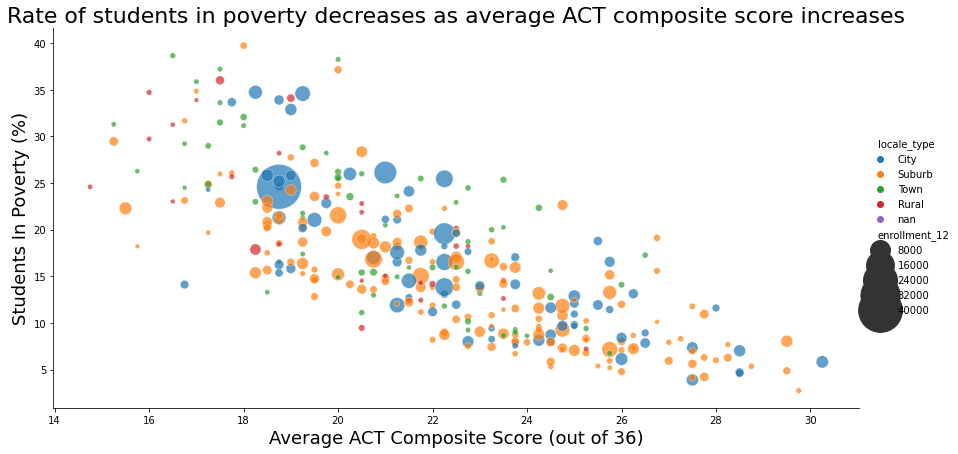

In [64]:
sns.relplot(y='%kids_poverty', x="avg_comp_act", data=df_big_act, hue='locale_type', size='enrollment_12', sizes=(20, 2000),alpha = 0.7, height=6, aspect=12/6)
plt.ylabel("Students In Poverty (%)",fontdict={'fontsize':18})
plt.xlabel("Average ACT Composite Score (out of 36)",fontdict={'fontsize':18})
plt.title('Rate of students in poverty decreases as average ACT composite score increases',fontdict={'fontsize':22});

- #### % Average Household Income  v.s. Average ACT Composite Score

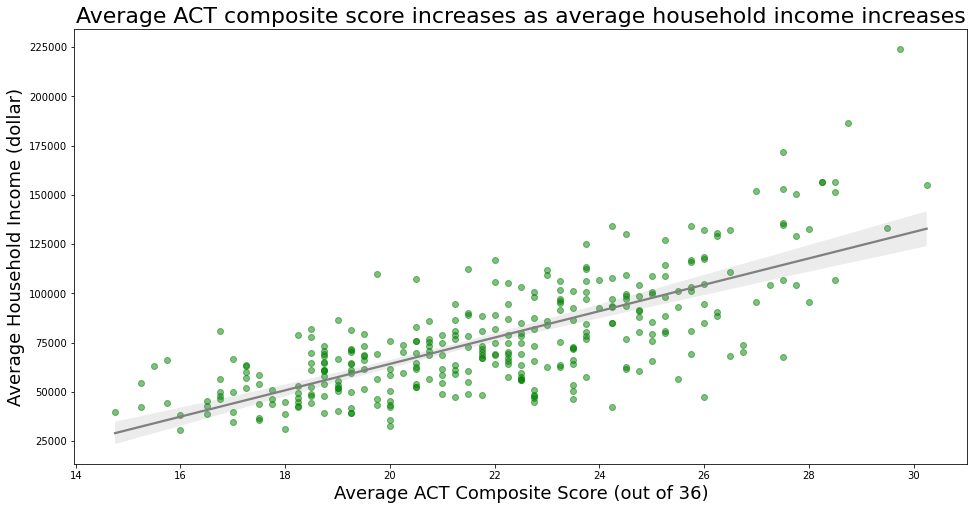

In [65]:
plt.figure(figsize=(16,8))
sns.regplot(y="avg_household_income", x="avg_comp_act", data=df_big_act, scatter_kws = {'color': 'g', 'alpha': 0.5}, line_kws = {'color': 'grey'} )
plt.ylabel("Average Household Income (dollar)",fontdict={'fontsize':18})
plt.xlabel("Average ACT Composite Score (out of 36)",fontdict={'fontsize':18})
plt.title('Average ACT composite score increases as average household income increases',fontdict={'fontsize':22});

Text(0.5, 20.799999999999983, 'Average ACT Composite Score (out of 36)')

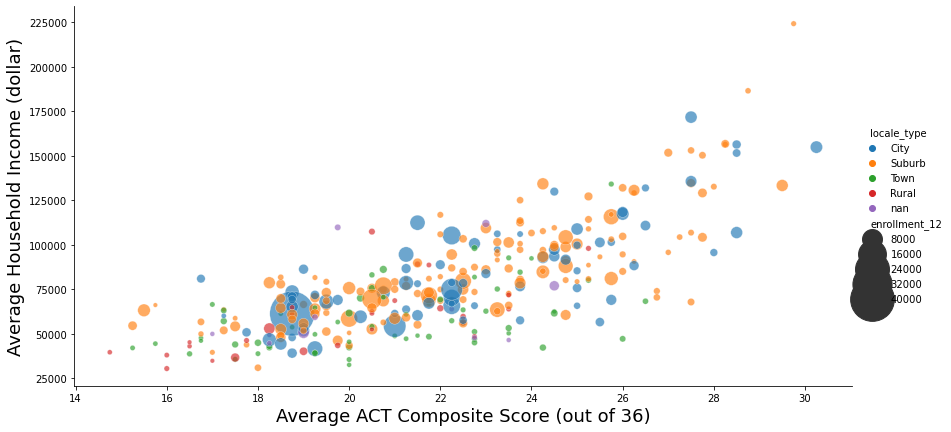

In [66]:
sns.relplot(y='avg_household_income', x="avg_comp_act", data=df_big_act, hue='locale_type', size='enrollment_12', sizes=(20, 2000),alpha = 0.65, height=6, aspect=12/6)
plt.ylabel("Average Household Income (dollar)",fontdict={'fontsize':18})
plt.xlabel("Average ACT Composite Score (out of 36)",fontdict={'fontsize':18})
# plt.title('Average ACT composite score increases as average household income increases',fontdict={'fontsize':22});

After performing the same plotting procedures, we find that the ACT data confirms our findings with the SAT data: 
- There is little correlation between ACT test scores and instrutional expenditures.
- There is little correlation between ACT test scores and student-teacher-ratio.
- As student poverty rate decreases, ACT scores tend to increase.
- As averge househhold income increases, ACT scores tend to increase.

## Conclusions and Recommendations

Based on our exploration of the data, we find that school districts of Golden Plains Unified, Compton Unified, Reef-Sunset Unified, Fontana Unified, and Ravenswood City Elementary are the 5 districts that have the lowest composite ACT scores. 
In terms of reccomendations, we find that it is not as simple as allocating more funding to these districts in need. 
This is because we find there to be little-to-no correlation between standardized test performances and educational expenditures or student-teacher ratio. 

While there is little correlation between the test performances and school expenditures, we find that as average household income increases,  standardized test scores also tend to increase. 
Thus our initial assumption that allocating more funds to school districts with weaker performances helps improve standardize test performances may not be true, rendering fund allocation to districts in need less effective.

Along with the postive correlation between test scores and average household income, we infer that school teaching may not have a huge impact on standardized test scores, and that private standardize testing preperations may play a role in students' standardized test performance.
As for future work, this illustrates the potential inequity inherent in standardized testing practices, and begs for closer examination from educators and researchers to address and improve such issues of inequity.
